#  **Cancer Risk Factors & Types**
A compact, standardized tabular dataset linking lifestyle, environmental, and genetic signals to five cancer types — 2,000 records × 21 features with clear encodings (0–10 ordinal indices, BMI/Age, BRCA, H. pylori). Optimized for EDA, dashboards, and multiclass ML (Cancer_Type), plus an optional composite Overall_Risk_Score and Risk_Level for stratification.

## **Why this dataset?**
* Explore risk patterns across lifestyle and environmental exposures
* Build dashboards to visualize prevalence and risk distributions
* Train multiclass ML models with clean, consistent features
* Practice class imbalance handling and evaluation beyond accuracy (e.g., macro-F1)

## **Targets & Tasks**
* Primary target: Cancer_Type ∈ {Lung, Breast, Colon, Prostate, Skin}
* Recommended metrics: macro-F1, accuracy, confusion matrix.
* Optional task: Risk stratification via Risk_Level ∈ {Low, Medium, High} derived from Overall_Risk_Score (0–1).
* Default thresholds (example): Low < 0.35, 0.35 ≤ Medium ≤ 0.65, High > 0.65.
* Due to imbalance (Medium is majority), consider class weights or stratified CV.

## Analysis Pipeline
*  **Load the Analysis Stack**
*   **Reading the Data Source**
*   **Identify Categorical Features**
*   **Analyze Categorical Features**
*   **Assess Feature Importance**
*   **Chi-Squared Test**
*   **Observed Frequencies**
*   **Analyze Numerical Features**
*   **Identify Numerical Features**
*   **Explore Relationship With Risk Level**
*   **Drop irrelevant ID columns**
*   **One-hot encode categorical columns**
*   **Define features and target**
*   **Split data into train/test**
*   **(Optional) Feature scaling for numerical columns**
*   **Train and evaluate Random Forest**
*   **Train and evaluate Logistic Regression**
*   **Compute metrics for both models**
*   **Visualization: Compare Model Metrics**
*   **Feature**
*   **Visualization: Top 5 Feature**

## Load the Analysis Stack

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Reading the Data Source

In [2]:
data = pd.read_csv("D:/PYTHON 2/ᗪᗩTᗩ/OCTOBER/Cancer-Risk-Factors/cancer-risk-factors.csv")
print("✅ Loaded successfully!")
print("Shape:", data.shape)
data.head()

✅ Loaded successfully!
Shape: (2000, 21)


,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

In [4]:
data. duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [5]:
data.columns

Index(['Patient_ID', 'Cancer_Type', 'Age', 'Gender', 'Smoking', 'Alcohol_Use',
       'Obesity', 'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed',
       'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution',
       'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection',
       'Calcium_Intake', 'Overall_Risk_Score', 'BMI',
       'Physical_Activity_Level', 'Risk_Level'],
      dtype='object')

## Identify Categorical Features

In [6]:
Identify_categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", Identify_categorical_columns)

Categorical columns: ['Patient_ID', 'Cancer_Type', 'Risk_Level']


## Analyze Categorical Features

Distribution of Cancer_Type:


Cancer_Type
Lung        527
Breast      460
Colon       418
Prostate    305
Skin        290
Name: count, dtype: int64

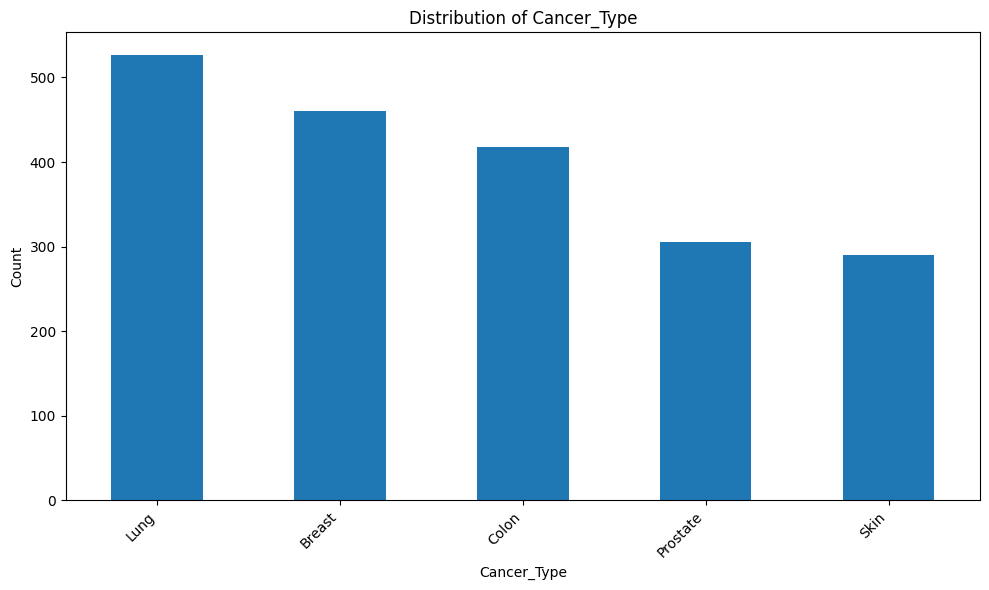

Distribution of Risk_Level:


Risk_Level
Medium    1574
Low        324
High       102
Name: count, dtype: int64

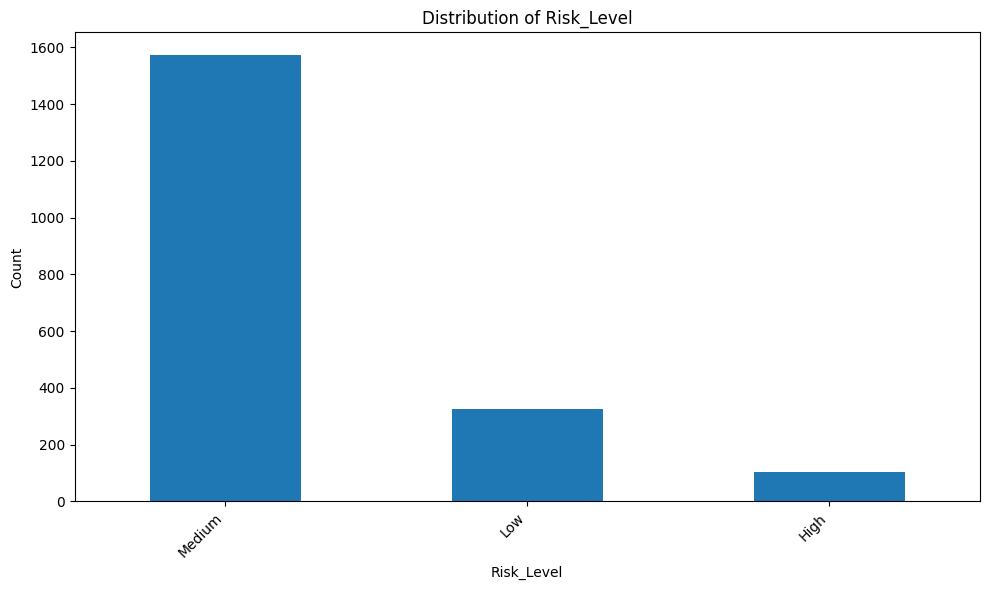

In [7]:
Analyze_Categorical_Cols = ['Cancer_Type', 'Risk_Level']

for col in Analyze_Categorical_Cols:
    print(f"Distribution of {col}:")
    display(data[col].value_counts())


    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Assess Feature Importance 

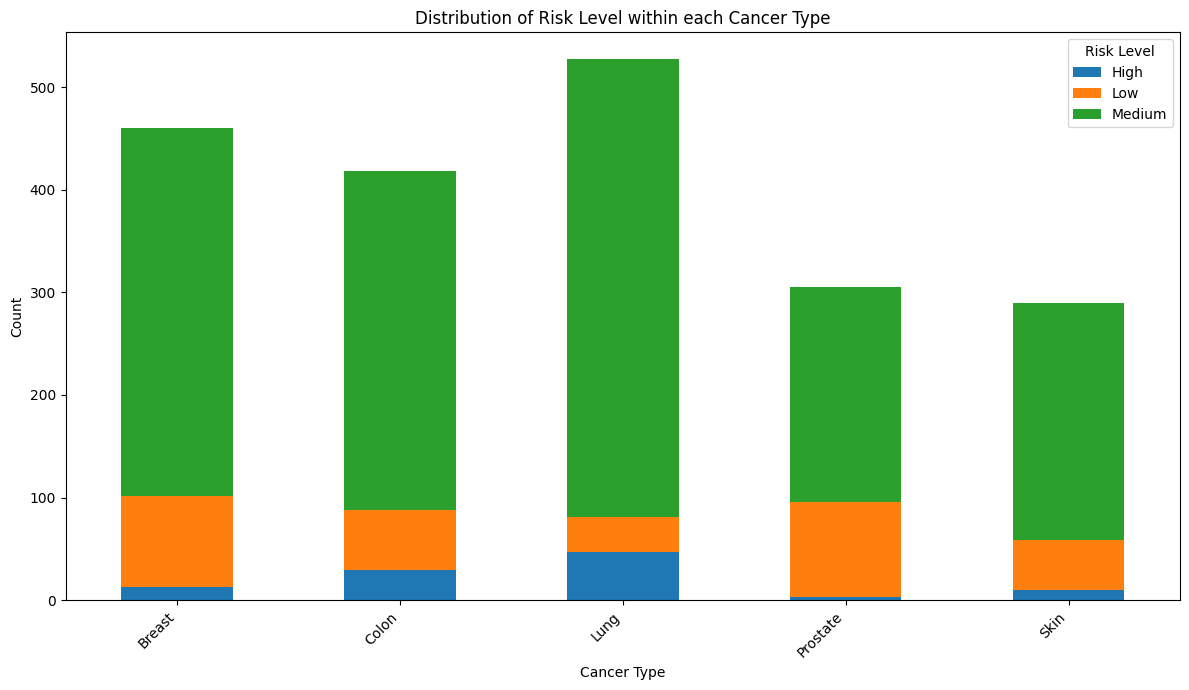

In [8]:
Crosstab_Cancer_Risk = pd.crosstab(data['Cancer_Type'], data['Risk_Level'])


Crosstab_Cancer_Risk.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Risk Level within each Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Level')
plt.tight_layout()
plt.show()

## Chi-Squared Test

In [9]:
#  Create contingency table
Contingency_Table = pd.crosstab(data['Cancer_Type'], data['Risk_Level'])

#  Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(Contingency_Table)

# Display test results
print("Chi-Squared Test Results:")
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected Frequencies Table:")
display(pd.DataFrame(expected, 
                     columns=Contingency_Table.columns, 
                     index=Contingency_Table.index))

# Interpret result
alpha = 0.05
print("\n=== Interpretation ===")
if p < alpha:
    print(f"The p-value ({p:.4f}) is less than the significance level ({alpha}), so we REJECT the null hypothesis.")
    print("→ There is a statistically significant association between Cancer_Type and Risk_Level.")
else:
    print(f"The p-value ({p:.4f}) is greater than the significance level ({alpha}), so we FAIL TO REJECT the null hypothesis.")
    print("→ There is NO statistically significant association between Cancer_Type and Risk_Level.")

Chi-Squared Test Results:
Chi-squared statistic: 114.0243
P-value: 0.0000
Degrees of freedom: 8

Expected Frequencies Table:


Risk_Level,High,Low,Medium
Cancer_Type,,,
Breast,23.460,74.520,362.020
Colon,21.318,67.716,328.966
Lung,26.877,85.374,414.749
Prostate,15.555,49.410,240.035
Skin,14.790,46.980,228.230



=== Interpretation ===
The p-value (0.0000) is less than the significance level (0.05), so we REJECT the null hypothesis.
→ There is a statistically significant association between Cancer_Type and Risk_Level.


## Observed Frequencies

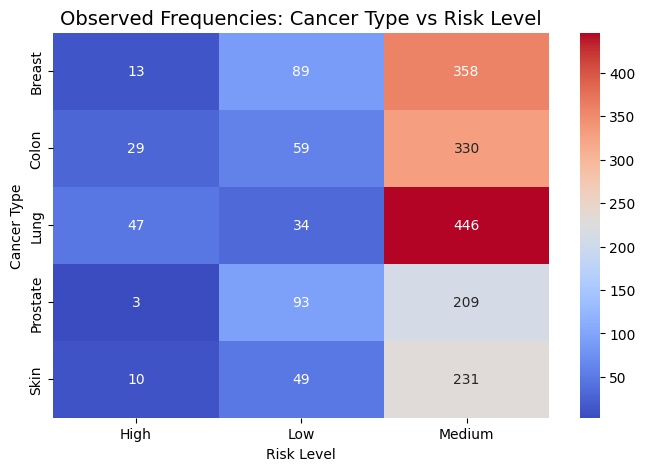

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(Contingency_Table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Observed Frequencies: Cancer Type vs Risk Level", fontsize=14)
plt.xlabel("Risk Level")
plt.ylabel("Cancer Type")
plt.show()

## Identify Numerical Features

In [11]:
Numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", Numerical_columns)

Numerical columns: ['Age', 'Gender', 'Smoking', 'Alcohol_Use', 'Obesity', 'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed', 'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution', 'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection', 'Calcium_Intake', 'Overall_Risk_Score', 'BMI', 'Physical_Activity_Level']


## Analyze Numerical Features

Descriptive statistics for Age:


count    2000.000000
mean       63.248000
std        10.462946
min        25.000000
25%        56.000000
50%        64.000000
75%        70.000000
max        90.000000
Name: Age, dtype: float64

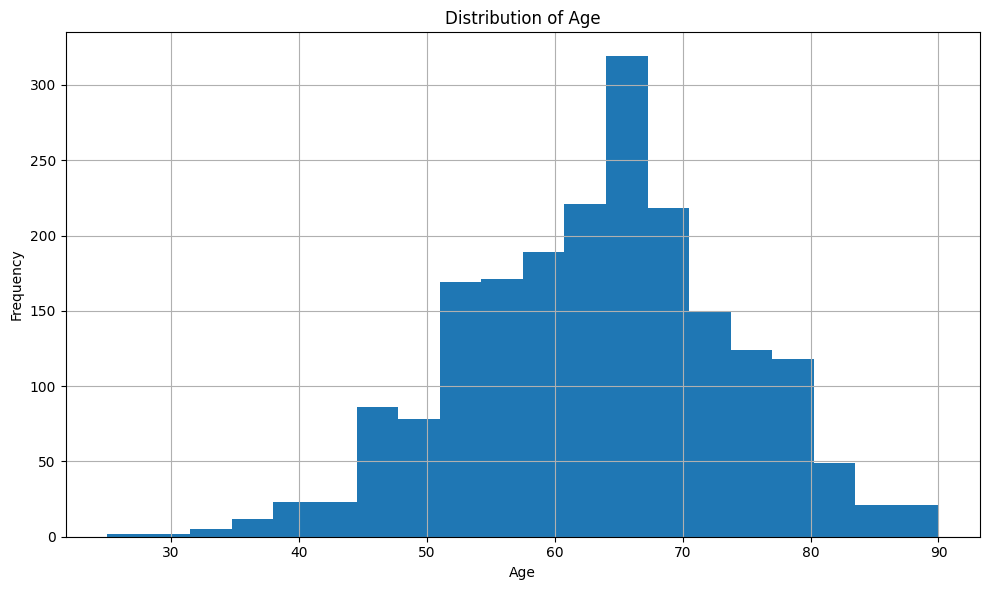

Descriptive statistics for Gender:


count    2000.000000
mean        0.489000
std         0.500004
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64

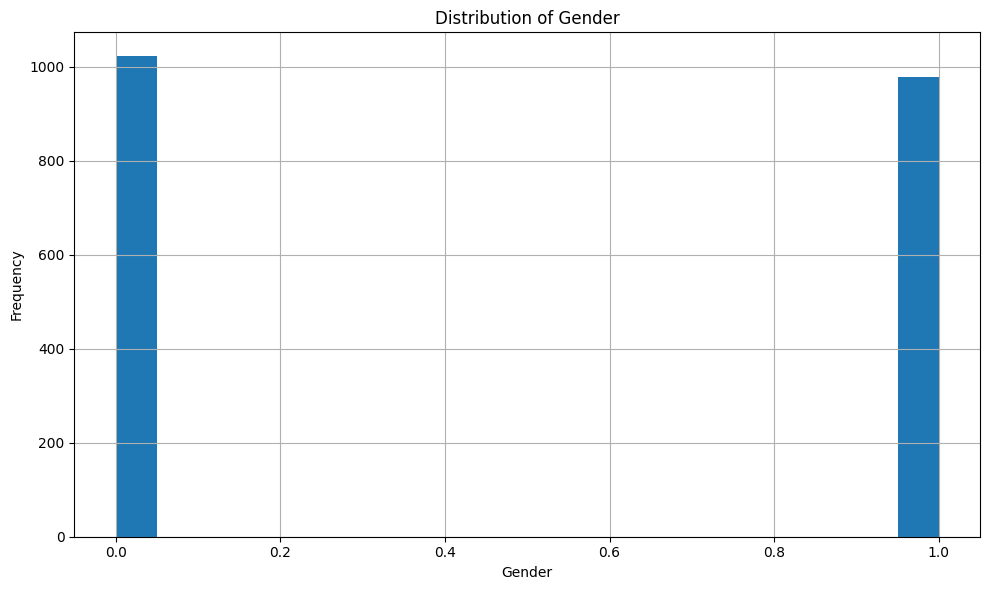

Descriptive statistics for Smoking:


count    2000.000000
mean        5.157000
std         3.325339
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Smoking, dtype: float64

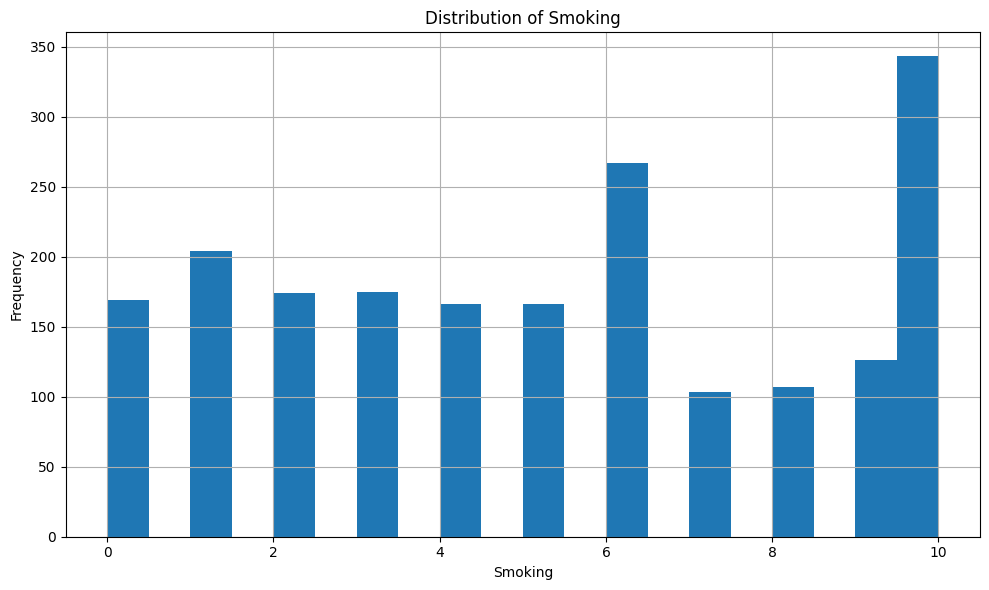

Descriptive statistics for Alcohol_Use:


count    2000.000000
mean        5.035000
std         3.260996
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Alcohol_Use, dtype: float64

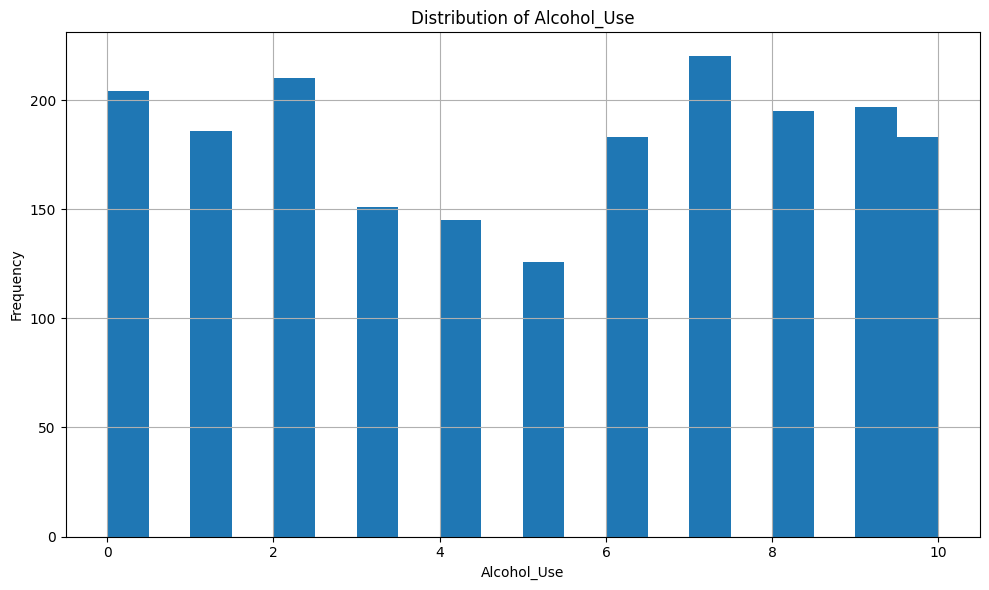

Descriptive statistics for Obesity:


count    2000.000000
mean        5.967500
std         3.061393
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        10.000000
Name: Obesity, dtype: float64

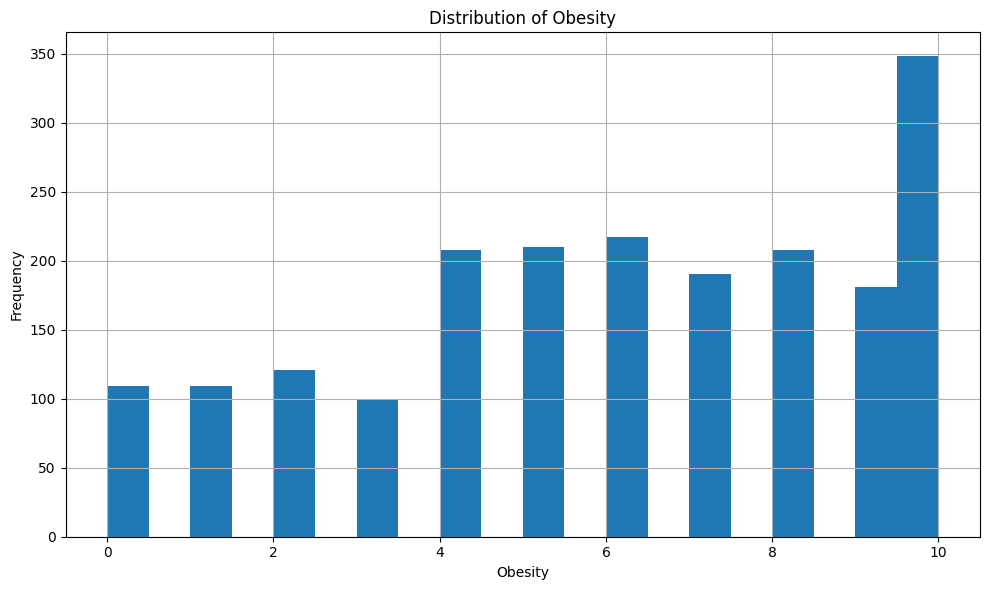

Descriptive statistics for Family_History:


count    2000.000000
mean        0.194500
std         0.395914
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Family_History, dtype: float64

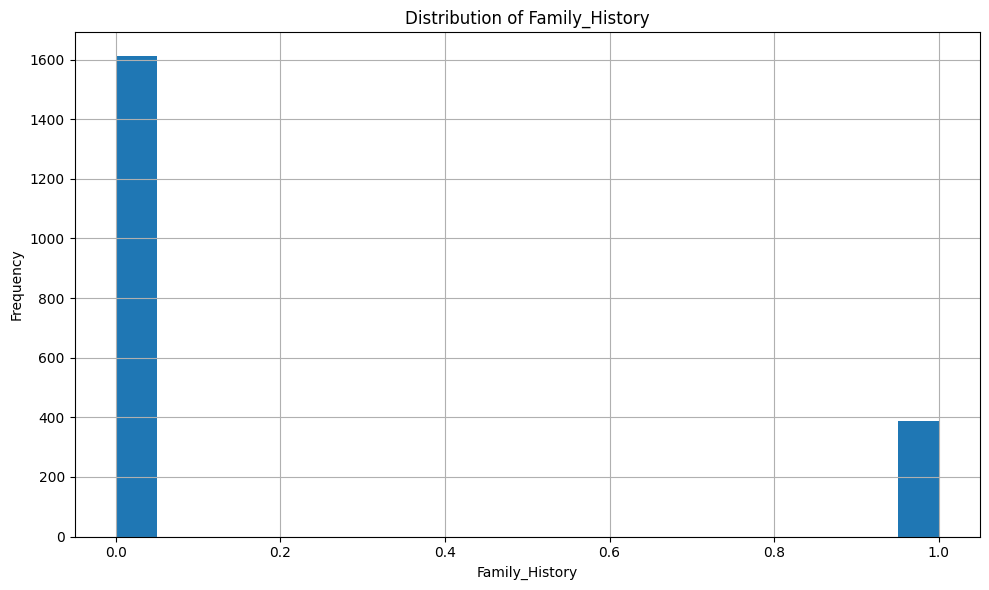

Descriptive statistics for Diet_Red_Meat:


count    2000.000000
mean        5.189500
std         3.154452
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Diet_Red_Meat, dtype: float64

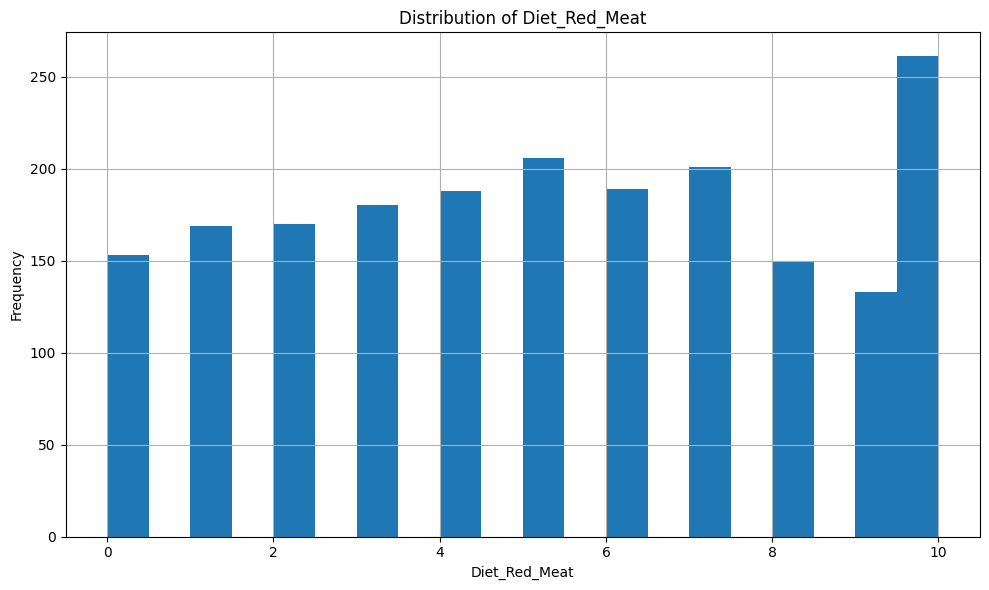

Descriptive statistics for Diet_Salted_Processed:


count    2000.000000
mean        4.563500
std         3.088323
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        10.000000
Name: Diet_Salted_Processed, dtype: float64

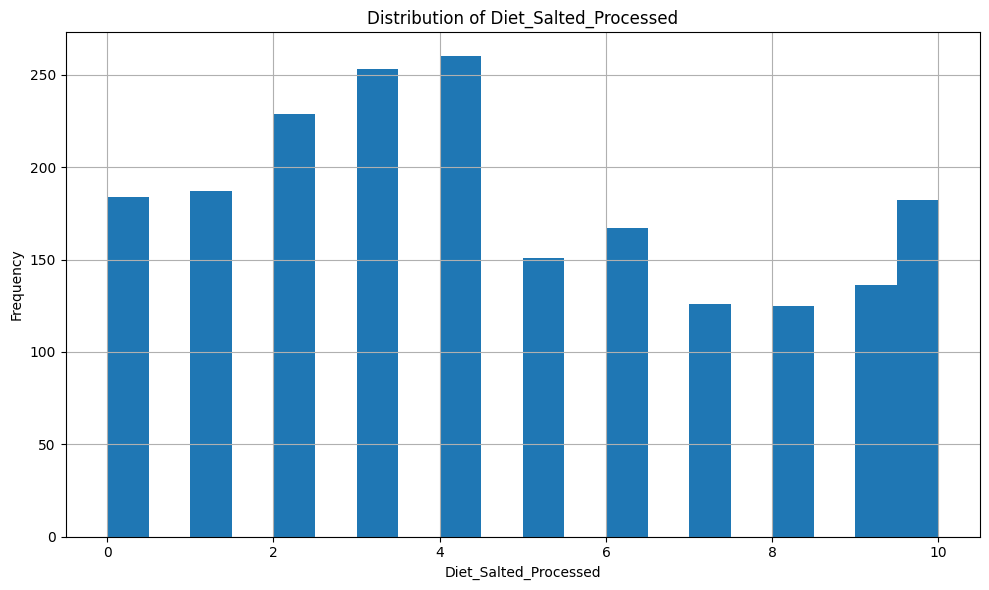

Descriptive statistics for Fruit_Veg_Intake:


count    2000.000000
mean        4.927500
std         3.045305
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Fruit_Veg_Intake, dtype: float64

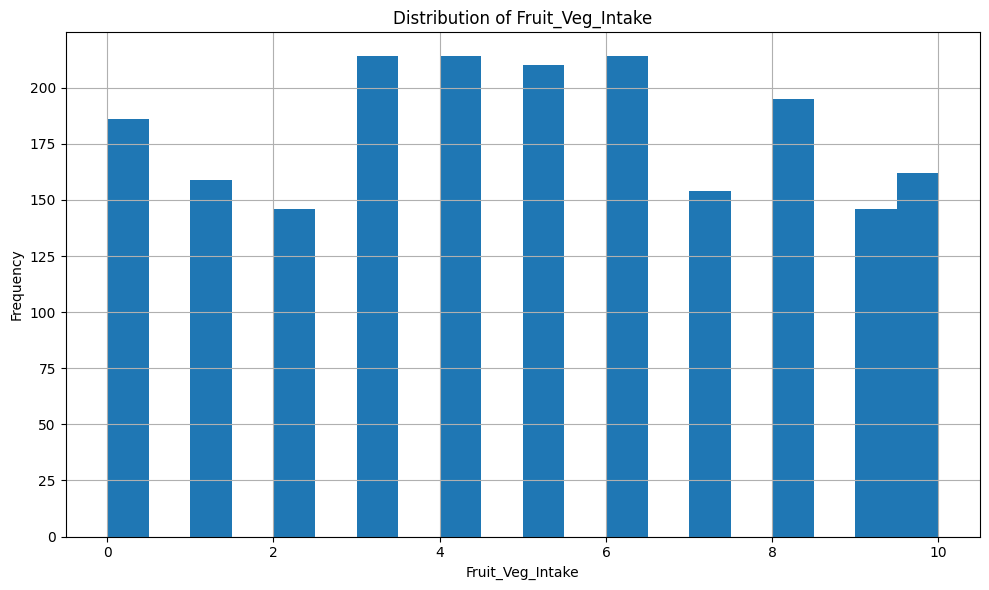

Descriptive statistics for Physical_Activity:


count    2000.000000
mean        4.015000
std         2.978458
min         0.000000
25%         1.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: Physical_Activity, dtype: float64

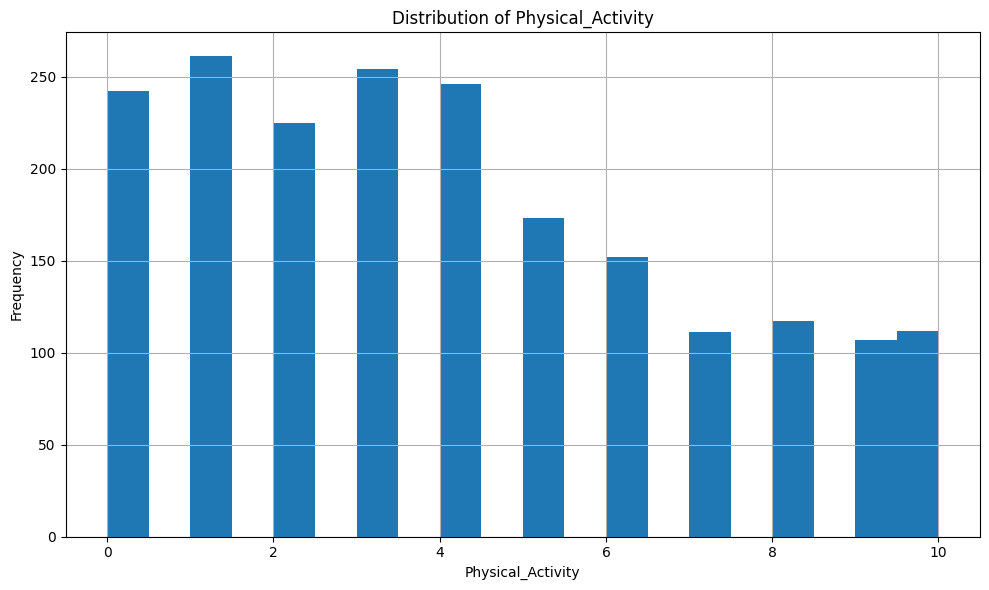

Descriptive statistics for Air_Pollution:


count    2000.000000
mean        5.323000
std         3.207462
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Air_Pollution, dtype: float64

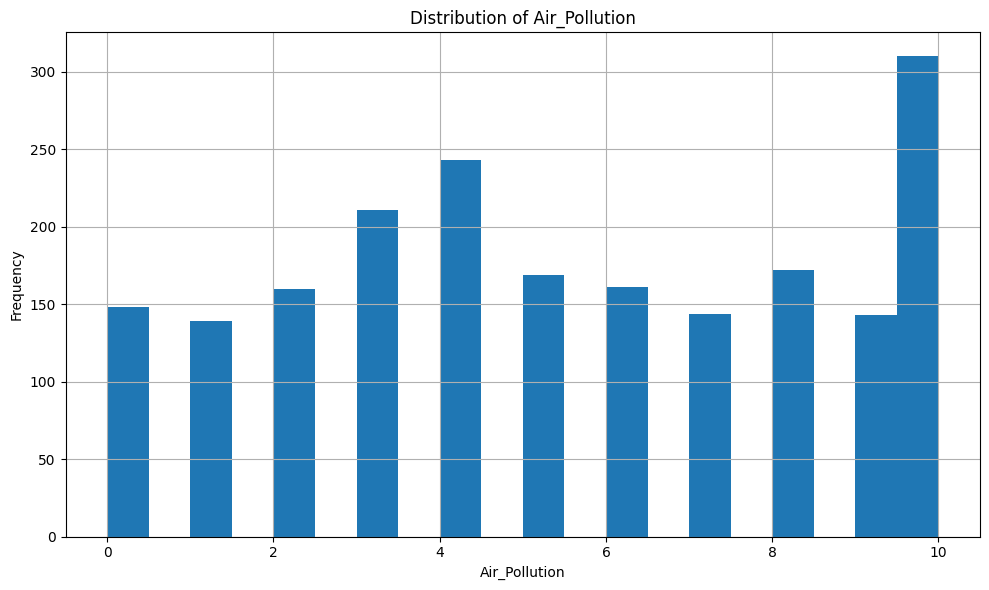

Descriptive statistics for Occupational_Hazards:


count    2000.000000
mean        4.979000
std         3.212899
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Occupational_Hazards, dtype: float64

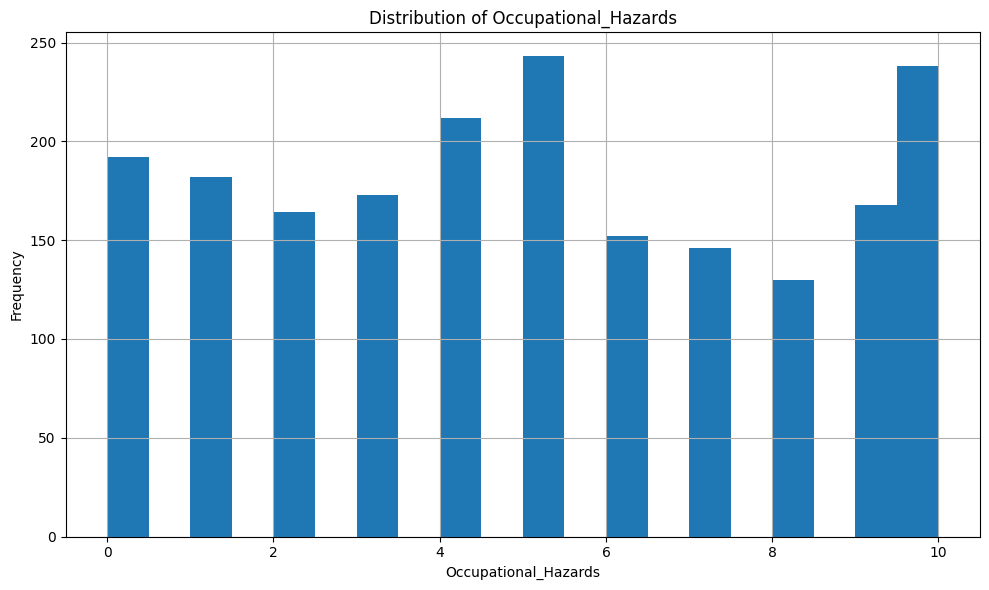

Descriptive statistics for BRCA_Mutation:


count    2000.000000
mean        0.032500
std         0.177368
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BRCA_Mutation, dtype: float64

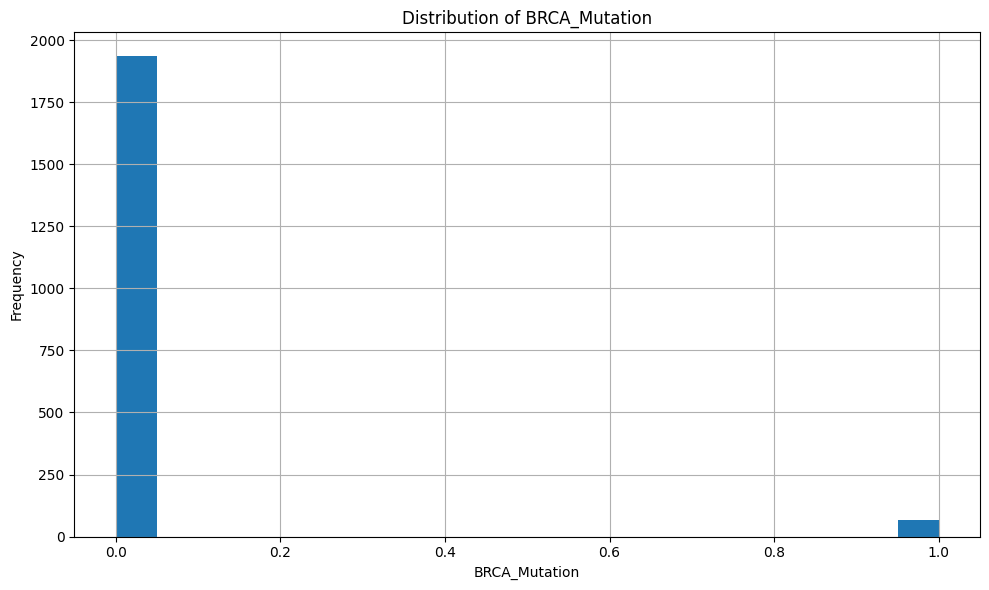

Descriptive statistics for H_Pylori_Infection:


count    2000.00000
mean        0.19650
std         0.39745
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: H_Pylori_Infection, dtype: float64

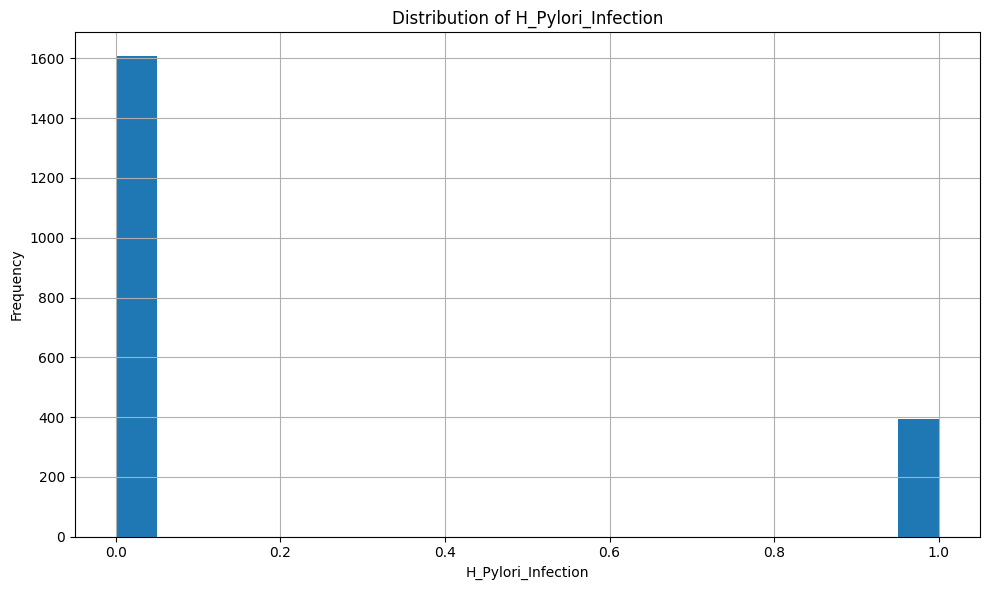

Descriptive statistics for Calcium_Intake:


count    2000.00000
mean        3.94050
std         3.04887
min         0.00000
25%         1.00000
50%         4.00000
75%         6.00000
max        10.00000
Name: Calcium_Intake, dtype: float64

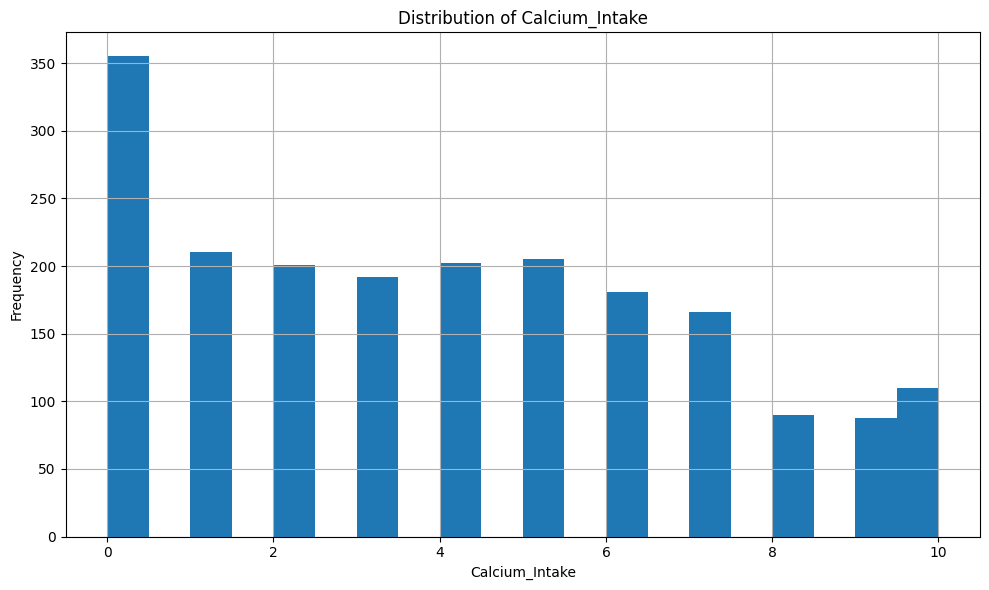

Descriptive statistics for Overall_Risk_Score:


count    2000.000000
mean        0.454449
std         0.123074
min         0.029285
25%         0.366982
50%         0.455399
75%         0.539782
max         0.852158
Name: Overall_Risk_Score, dtype: float64

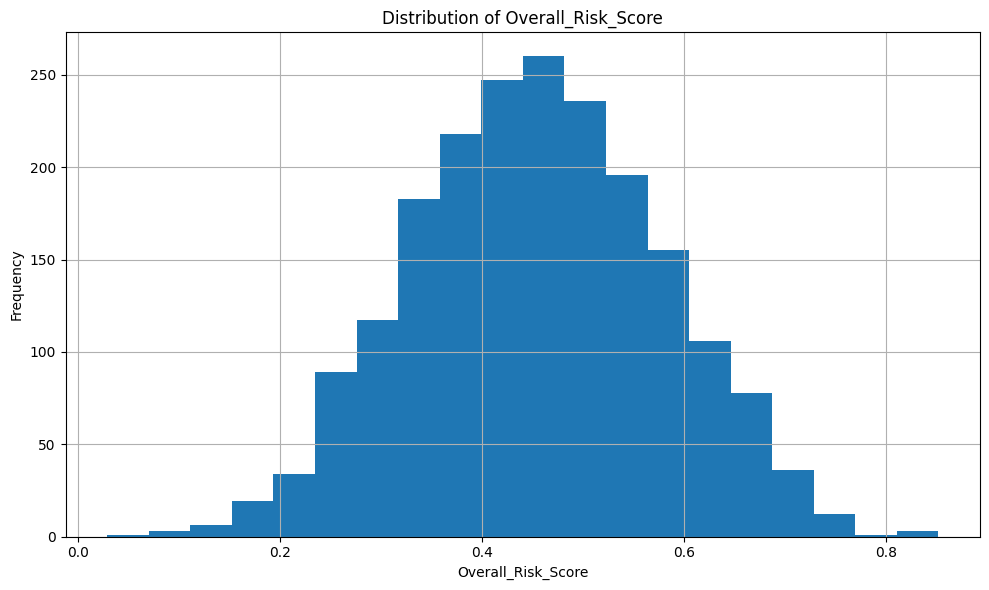

Descriptive statistics for BMI:


count    2000.000000
mean       26.183350
std         3.947459
min        15.000000
25%        23.500000
50%        26.200000
75%        28.700000
max        41.400000
Name: BMI, dtype: float64

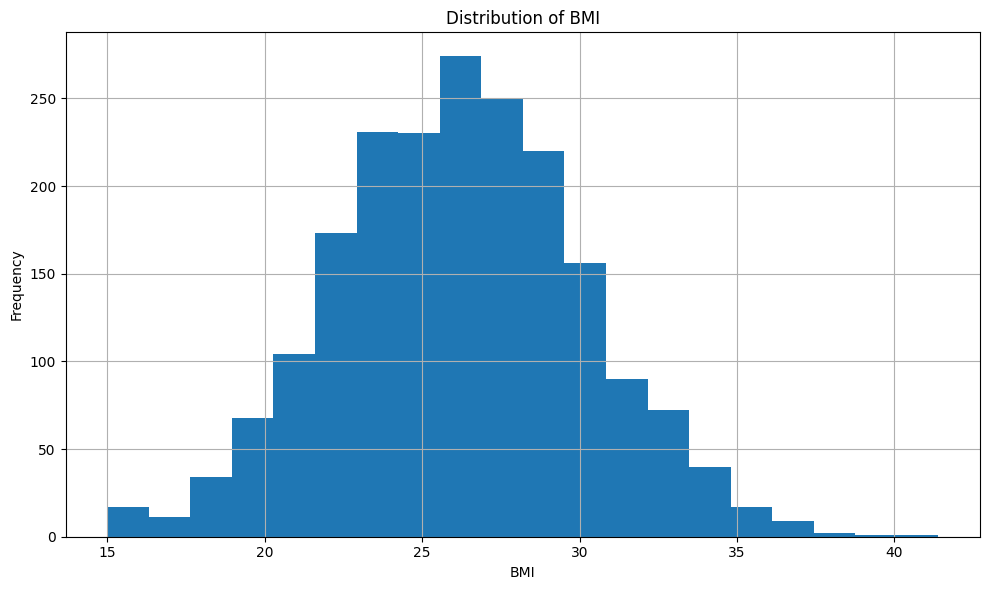

Descriptive statistics for Physical_Activity_Level:


count    2000.000000
mean        4.938500
std         3.166027
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Physical_Activity_Level, dtype: float64

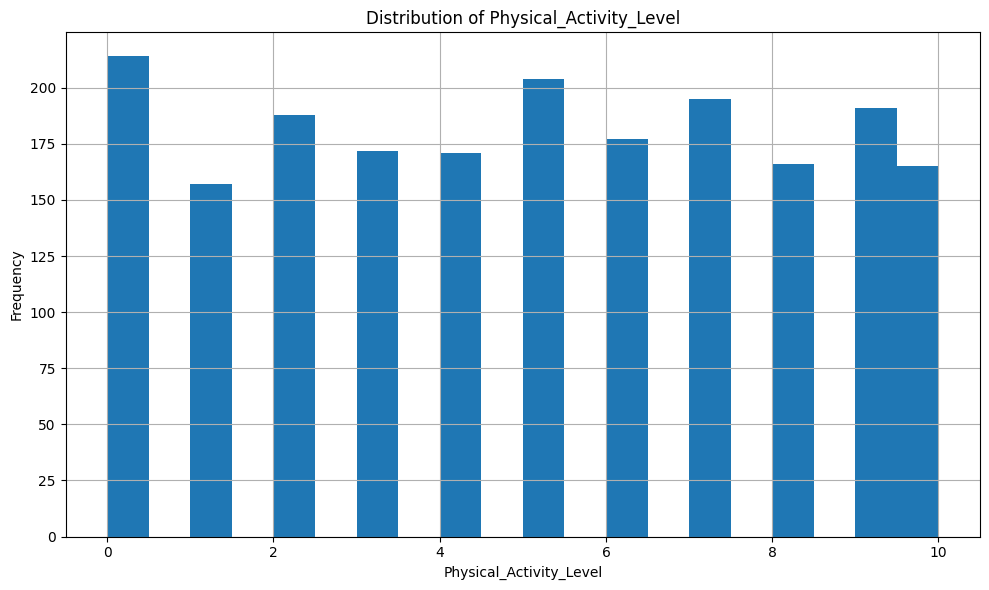

In [12]:
for col in Numerical_columns:
    print(f"Descriptive statistics for {col}:")
    display(data[col].describe())

    plt.figure(figsize=(10, 6))
    data[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Explore Relationship With Risk Level

<Figure size 1000x600 with 0 Axes>

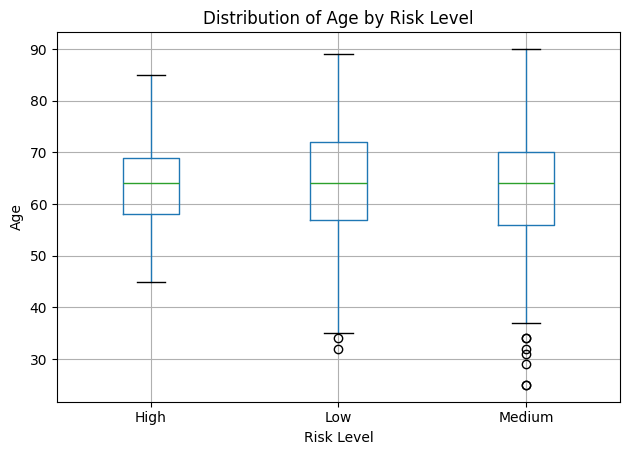

<Figure size 1000x600 with 0 Axes>

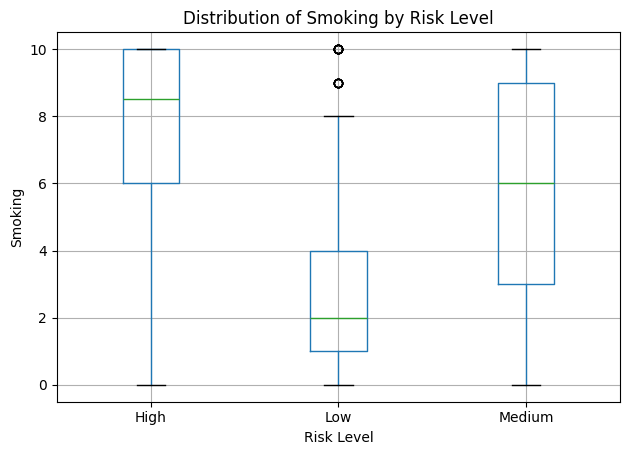

<Figure size 1000x600 with 0 Axes>

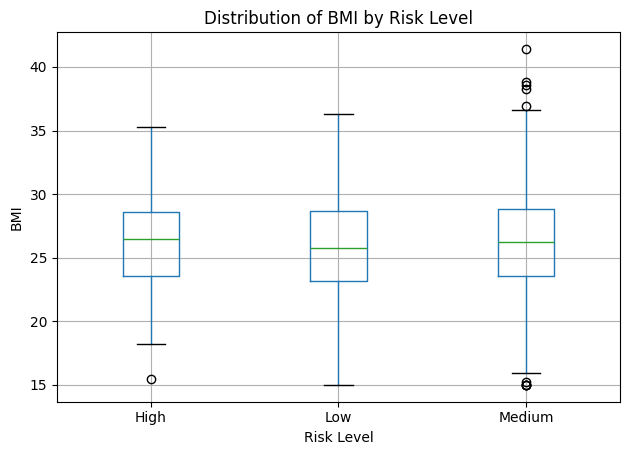

<Figure size 1000x600 with 0 Axes>

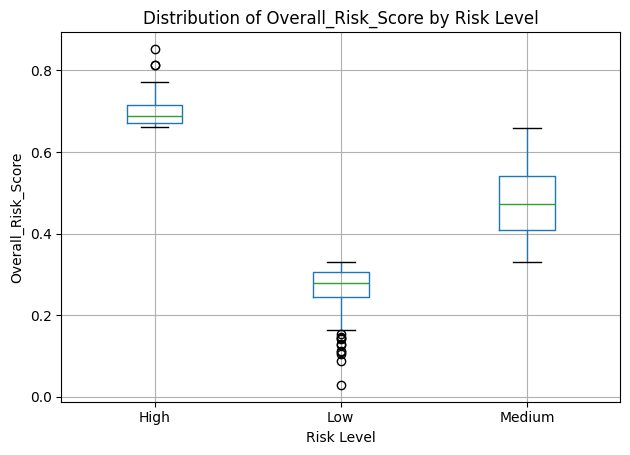

In [13]:
Selected_Numerical_Columns = ['Age', 'Smoking', 'BMI', 'Overall_Risk_Score']

for col in Selected_Numerical_Columns:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=col, by='Risk_Level')
    plt.title(f'Distribution of {col} by Risk Level')
    plt.suptitle('') 
    plt.xlabel('Risk Level')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Drop irrelevant ID columns

In [14]:
data = data.drop(columns=['Patient_ID'], errors='ignore')

## One-hot encode categorical columns

In [15]:
Categorical_Columns = ['Gender', 'Diet_Salted_Processed', 'Alcohol_Use', 'Smoking']
Data_Encoded = pd.get_dummies(data, columns=Categorical_Columns + ['Risk_Level'], drop_first=True)

## Define features and target

In [16]:
X = Data_Encoded.drop('Cancer_Type', axis=1)
y = Data_Encoded['Cancer_Type']

## Split data into train/test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## (Optional) Feature scaling for numerical columns

In [18]:
Numerical_Features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
scaler = StandardScaler()
X_train[Numerical_Features] = scaler.fit_transform(X_train[Numerical_Features])
X_test[Numerical_Features] = scaler.transform(X_test[Numerical_Features])

display(X_train.head())

,Age,Obesity,Family_History,Diet_Red_Meat,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,...,Smoking_3,Smoking_4,Smoking_5,Smoking_6,Smoking_7,Smoking_8,Smoking_9,Smoking_10,Risk_Level_Low,Risk_Level_Medium
968,-1.381267,-1.619344,-0.492175,1.525043,-0.642220,-1.341527,0.203452,0.616996,-0.177743,-0.483338,...,False,False,False,True,False,False,False,False,False,True
240,1.534079,0.328739,2.031798,-1.643466,0.671785,-0.008332,1.443541,0.927337,-0.177743,-0.483338,...,False,True,False,False,False,False,False,False,False,True
819,-1.575623,0.653420,2.031798,0.574490,0.343284,-0.674930,-1.346659,-1.245049,5.626105,-0.483338,...,False,False,False,True,False,False,False,False,False,True
692,-0.895376,-1.944025,2.031798,1.525043,0.014783,-1.008228,-0.726615,-0.624367,5.626105,-0.483338,...,False,False,False,False,False,False,False,False,False,True
420,-3.033296,0.653420,-0.492175,-0.059212,1.657288,-1.341527,-0.416592,-0.314026,-0.177743,-0.483338,...,False,False,False,False,False,False,False,False,True,False


## Train and evaluate Random Forest

In [19]:
Random_Forest_Model = RandomForestClassifier(random_state=42)
Random_Forest_Model.fit(X_train, y_train)
Random_Forest_Predict = Random_Forest_Model.predict(X_test)

## Train and evaluate Logistic Regression

In [20]:
Logistic_Regression_Model = LogisticRegression(max_iter=1000, random_state=42)
Logistic_Regression_Model.fit(X_train, y_train)
Logistic_Regression_Predict = Logistic_Regression_Model.predict(X_test)

## Compute metrics for both models

In [21]:
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-score": f1_score(y_true, y_pred, average='weighted')
    }

Results = [
    get_metrics(y_test, Random_Forest_Predict, "Random Forest"),
    get_metrics(y_test, Logistic_Regression_Predict, "Logistic Regression")
]

Metrics = pd.DataFrame(Results)
display(Metrics)

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.7375,0.736322,0.7375,0.731575
1,Logistic Regression,0.7425,0.740472,0.7425,0.740889


## Visualization: Compare Model Metrics

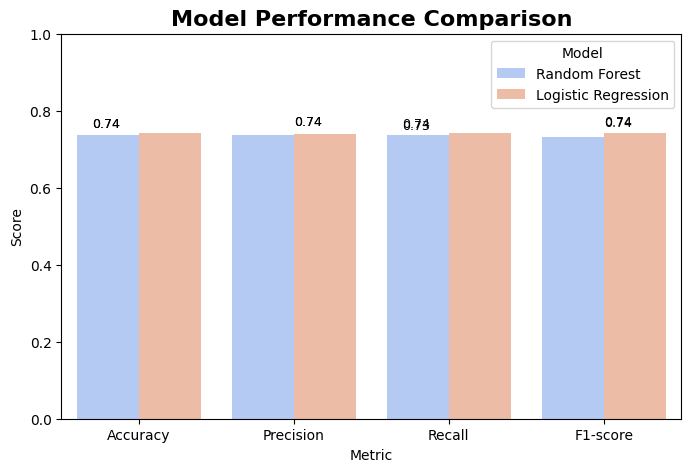

In [22]:
Model_Metrics = Metrics.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8,5))
sns.barplot(data=Model_Metrics, x="Metric", y="Score", hue="Model", palette="coolwarm")
plt.title("Model Performance Comparison", fontsize=16, weight='bold')
plt.ylim(0, 1)
for i, row in Model_Metrics.iterrows():
    plt.text(i % 4 - 0.3 + (0.3 if row.Model == 'Logistic Regression' else 0), 
             row.Score + 0.02, f"{row.Score:.2f}", fontsize=9)
plt.show()

## Feature

In [23]:
Importances = Random_Forest_Model.feature_importances_
Feature_Names = X_train.columns
Feature_Importance = pd.DataFrame({'feature': Feature_Names, 'importance': Importances})
Feature_Importance = Feature_Importance.sort_values(by='importance', ascending=False)
display(Feature_Importance)

,feature,importance
3,Diet_Red_Meat,0.095039
14,Gender_1,0.076346
6,Air_Pollution,0.071686
1,Obesity,0.067615
0,Age,0.065342
44,Smoking_10,0.064782
11,Overall_Risk_Score,0.060755
7,Occupational_Hazards,0.057619
10,Calcium_Intake,0.055082
12,BMI,0.044431


## Visualization: Top 5 Feature 

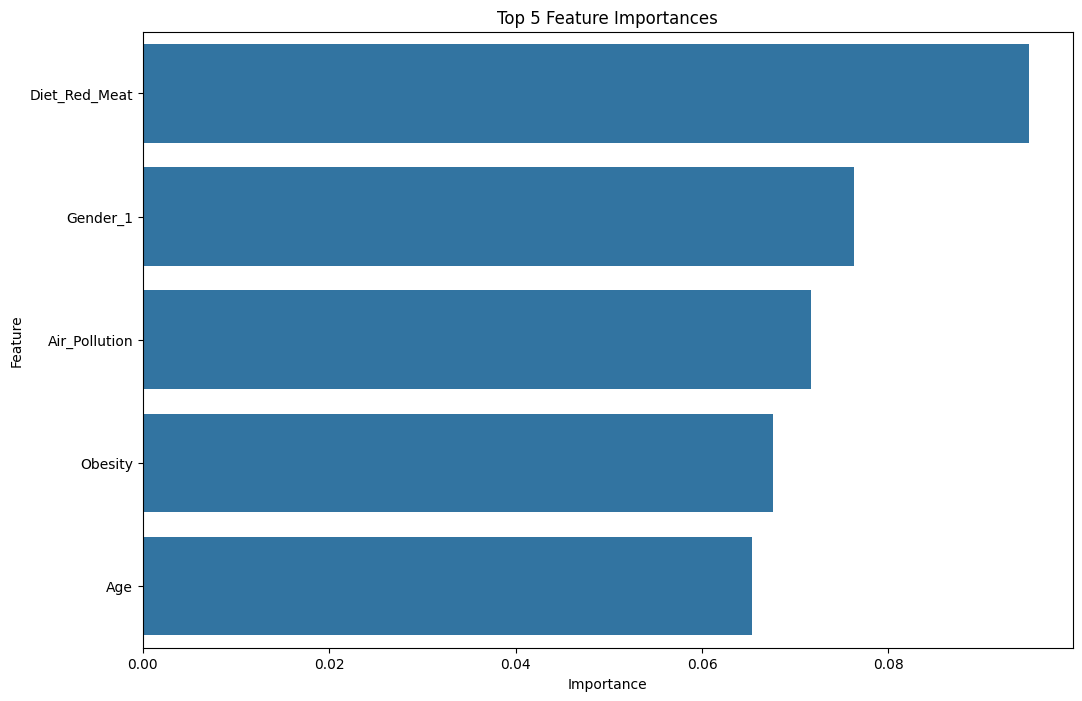

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=Feature_Importance.head(5))
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()